
Running HF simulations with basis set: 631++g
converged SCF energy = -1503.99503634935  <S^2> = 8.8077822  2S+1 = 6.0192299
Bond distance: 2.42 Å | HF Energy: -1503.99503635 Hartree
converged SCF energy = -1503.99507932756  <S^2> = 8.8064427  2S+1 = 6.0187848
Bond distance: 2.43 Å | HF Energy: -1503.99507933 Hartree
converged SCF energy = -1503.99510952226  <S^2> = 8.8052239  2S+1 = 6.0183798
Bond distance: 2.44 Å | HF Energy: -1503.99510952 Hartree
converged SCF energy = -1503.99512742198  <S^2> = 8.8041046  2S+1 = 6.0180078
Bond distance: 2.45 Å | HF Energy: -1503.99512742 Hartree
converged SCF energy = -1503.99513350651  <S^2> = 8.8030907  2S+1 = 6.0176709
Bond distance: 2.46 Å | HF Energy: -1503.99513351 Hartree
converged SCF energy = -1503.9951282457  <S^2> = 8.8021473  2S+1 = 6.0173573
Bond distance: 2.47 Å | HF Energy: -1503.99512825 Hartree
converged SCF energy = -1503.99511209906  <S^2> = 8.8012783  2S+1 = 6.0170685
Bond distance: 2.48 Å | HF Energy: -1503.99511210 Hartree
co

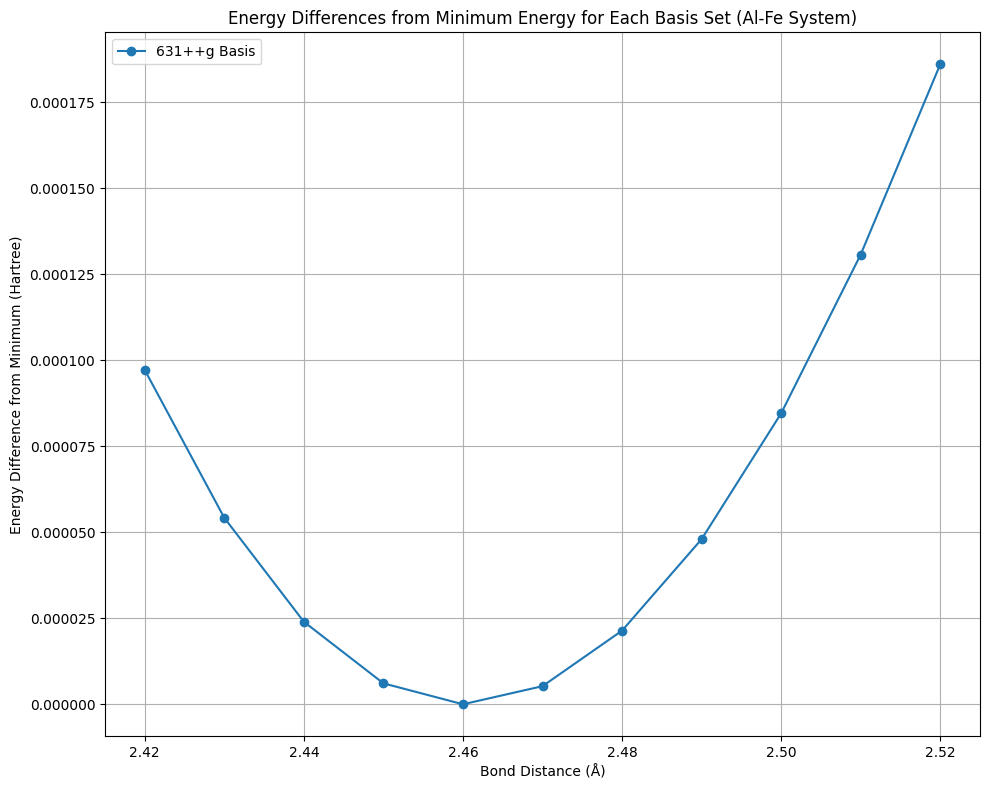

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf

# Create a directory named 'AlFe_structure' if it doesn't exist
output_dir = 'AlFe_structure'
os.makedirs(output_dir, exist_ok=True)

# Define the correct basis sets to compare
basis_sets = ['631++g']  # Correct PySCF basis set names

# Define the charge and spin for the Al-Fe system
charge = 0            # Neutral molecule
spin = 5              # For 11 electrons: spin = (N_up - N_down)/2
multiplicity = 6       # Multiplicity = 2S + 1 (S = spin/2)

# Define distances for the geometry, varying the bond length between Al and Fe atoms
distances = np.arange(2.42, 2.52, 0.01)  # Bond distance from 2.3 Å to 2.5 Å in steps of 0.1 Å

# Initialize a dictionary to store energies for each basis set
energies_dict = {}

# Loop over each basis set and perform Hartree-Fock calculations
for basis in basis_sets:
    hf_energies = []  # To store energies for the current basis set
    print(f'\nRunning HF simulations with basis set: {basis}')
    
    for d in distances:
        # Define the molecular geometry with the current bond distance
        geometry = [
            ('Al', (0.0, 0.0, 0.0)),        # Aluminum at origin
            ('Fe', (0.0, 0.0, d))           # Iron at distance 'd' along z-axis
        ]
        
        # Set up the molecule in PySCF
        mol = gto.M(
            atom=geometry,
            basis=basis,
            charge=charge,
            spin=spin,  # spin = N_up - N_down
            unit='angstrom'
        )
        
        # Perform Unrestricted Hartree-Fock (UHF) calculation
        mf = scf.UHF(mol)
        hf_energy = mf.kernel()
        
        # Store the Hartree-Fock energy
        hf_energies.append(hf_energy)
        
        print(f'Bond distance: {d:.2f} Å | HF Energy: {hf_energy:.8f} Hartree')

    # Store the energies in the dictionary
    energies_dict[basis] = hf_energies

# Now calculate the energy differences from the minimum energy for each basis set
energy_diff_from_min = {}

for basis in basis_sets:
    min_energy = min(energies_dict[basis])  # Find the minimum energy for the current basis set
    energy_diff_from_min[basis] = np.array(energies_dict[basis]) - min_energy  # Calculate energy difference

# Plotting the energy differences relative to the minimum energy for each basis set
plt.figure(figsize=(10, 8))

for basis in basis_sets:
    plt.plot(distances, energy_diff_from_min[basis], marker='o', linestyle='-', label=f'{basis} Basis')

# Add labels, title, and legend to the plot
plt.title('Energy Differences from Minimum Energy for Each Basis Set (Al-Fe System)')
plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy Difference from Minimum (Hartree)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Run CASSCF simulations 


Running CASSCF simulations with basis set: 6-31++G
converged SCF energy = -1503.80965762674
CASSCF energy = -1504.12416650652
CASCI E = -1504.12416650652  E(CI) = -47.1425667496676  S^2 = 8.7500000
Bond distance: 2.42 Å | CASSCF Energy: -1504.12416651 Hartree
converged SCF energy = -1503.80996757954
CASSCF energy = -1503.97853058810
CASCI E = -1503.97853058810  E(CI) = -38.7796238002197  S^2 = 8.7500000
Bond distance: 2.43 Å | CASSCF Energy: -1503.97853059 Hartree
converged SCF energy = -1503.81025791759
CASSCF energy = -1504.12593692247
CASCI E = -1504.12593692247  E(CI) = -29.5507093153385  S^2 = 8.7500000
Bond distance: 2.44 Å | CASSCF Energy: -1504.12593692 Hartree
converged SCF energy = -1503.81052924462
CASSCF energy = -1503.97750926675
CASCI E = -1503.97750926675  E(CI) = -38.6808629345348  S^2 = 8.7500000
Bond distance: 2.45 Å | CASSCF Energy: -1503.97750927 Hartree
converged SCF energy = -1503.81078218461
CASSCF energy = -1504.12750073304
CASCI E = -1504.12750073304  E(CI) = 

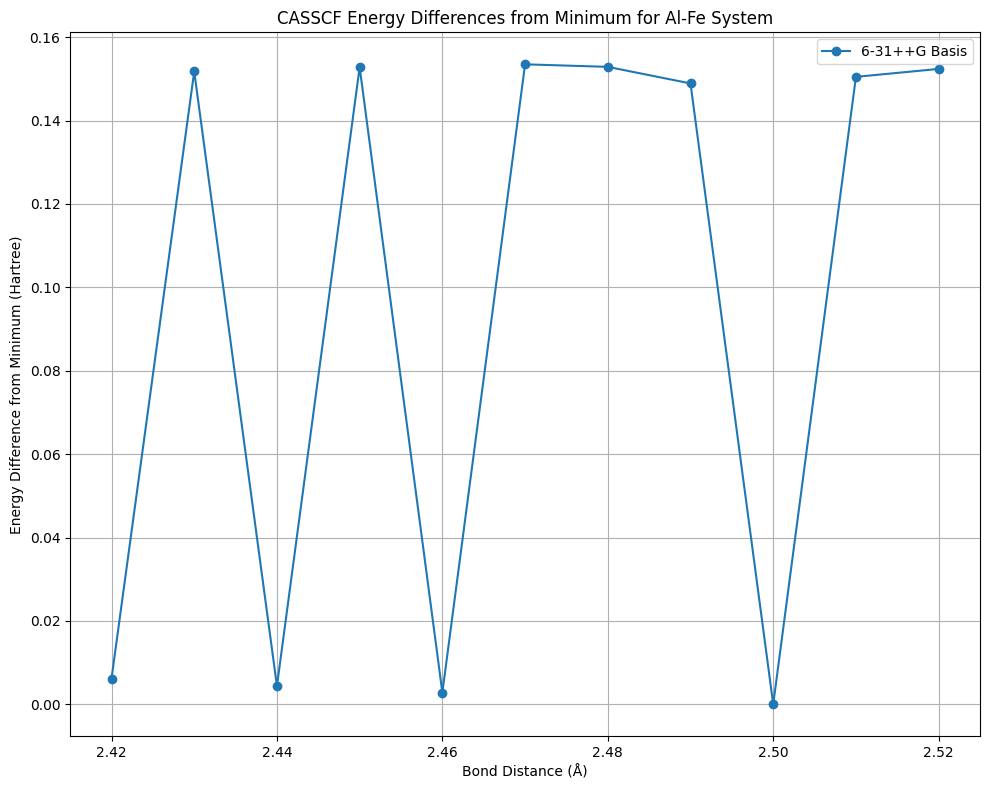

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, mcscf

# Create a directory named 'AlFe_structure' if it doesn't exist
output_dir = 'AlFe_structure'
os.makedirs(output_dir, exist_ok=True)

# Define the correct basis sets to compare
basis_sets = ['6-31++G']  # Correct PySCF basis set names

# Define the charge and spin for the Al-Fe system
charge = 0            # Neutral molecule
spin = 5              # For 11 electrons: spin = (N_up - N_down)/2
multiplicity = 6       # Multiplicity = 2S + 1 (S = spin/2)

# Define distances for the geometry, varying the bond length between Al and Fe atoms
distances = np.arange(2.42, 2.52, 0.01)  # Bond distance from 2.3 Å to 2.5 Å in steps of 0.1 Å

# Initialize a dictionary to store energies for each basis set
energies_dict = {}

# Active space for CASSCF
n_active_electrons = 11  # Number of active electrons
n_active_orbitals = 10   # Number of active orbitals

# Loop over each basis set and perform Hartree-Fock and CASSCF calculations
for basis in basis_sets:
    casscf_energies = []  # To store CASSCF energies for the current basis set
    print(f'\nRunning CASSCF simulations with basis set: {basis}')
    
    for d in distances:
        # Define the molecular geometry with the current bond distance
        geometry = [
            ('Al', (0.0, 0.0, 0.0)),        # Aluminum at origin
            ('Fe', (0.0, 0.0, d))           # Iron at distance 'd' along z-axis
        ]
        
        # Set up the molecule in PySCF
        mol = gto.M(
            atom=geometry,
            basis=basis,
            charge=charge,
            spin=spin,  # spin = N_up - N_down
            unit='angstrom'
        )
        
        # Perform Restricted Hartree-Fock (RHF) calculation
        mf = scf.RHF(mol)
        mf.kernel()

        # Perform CASSCF calculation (10 electrons, 10 orbitals)
        mc = mcscf.CASSCF(mf, n_active_orbitals, n_active_electrons)
        casscf_energy = mc.kernel()[0]  # Extract the total energy

        # Store the CASSCF energy
        casscf_energies.append(casscf_energy)
        
        print(f'Bond distance: {d:.2f} Å | CASSCF Energy: {casscf_energy:.8f} Hartree')

    # Store the CASSCF energies in the dictionary
    energies_dict[basis] = casscf_energies

# Now calculate the energy differences from the minimum energy for each basis set
energy_diff_from_min = {}

for basis in basis_sets:
    min_energy = min(energies_dict[basis])  # Find the minimum energy for the current basis set
    energy_diff_from_min[basis] = np.array(energies_dict[basis]) - min_energy  # Calculate energy difference

# Plotting the energy differences relative to the minimum energy for each basis set
plt.figure(figsize=(10, 8))

for basis in basis_sets:
    plt.plot(distances, energy_diff_from_min[basis], marker='o', linestyle='-', label=f'{basis} Basis')

# Add labels, title, and legend to the plot
plt.title('CASSCF Energy Differences from Minimum for Al-Fe System')
plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy Difference from Minimum (Hartree)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Run CCSD simulations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, cc

# Create a directory named 'AlFe_structure' if it doesn't exist
output_dir = 'AlFe_structure'
os.makedirs(output_dir, exist_ok=True)

# Define the correct basis sets to compare
basis_sets = ['6-31++G']  # Correct PySCF basis set names

# Define the charge and spin for the Al-Fe system
charge = 0            # Neutral molecule
spin = 5              # For 11 electrons: spin = (N_up - N_down)/2
multiplicity = 6       # Multiplicity = 2S + 1 (S = spin/2)

# Define distances for the geometry, varying the bond length between Al and Fe atoms
distances = np.arange(2.42, 2.50, 0.01)  # Bond distance from 2.3 Å to 2.5 Å in steps of 0.1 Å

# Initialize a dictionary to store energies for each basis set
energies_dict = {}

# Loop over each basis set and perform Hartree-Fock and CCSD calculations
for basis in basis_sets:
    ccsd_energies = []  # To store CCSD energies for the current basis set
    print(f'\nRunning CCSD simulations with basis set: {basis}')
    
    for d in distances:
        # Define the molecular geometry with the current bond distance
        geometry = [
            ('Al', (0.0, 0.0, 0.0)),        # Aluminum at origin
            ('Fe', (0.0, 0.0, d))           # Iron at distance 'd' along z-axis
        ]
        
        # Set up the molecule in PySCF
        mol = gto.M(
            atom=geometry,
            basis=basis,
            charge=charge,
            spin=spin,  # spin = N_up - N_down
            unit='angstrom'
        )
        
        # Perform Restricted Hartree-Fock (RHF) calculation
        mf = scf.RHF(mol)
        mf.kernel()

        # Perform CCSD calculation
        mycc = cc.CCSD(mf)
        mycc.kernel()
        ccsd_energy = mycc.e_tot  # Extract the total CCSD energy

        # Store the CCSD energy
        ccsd_energies.append(ccsd_energy)
        
        print(f'Bond distance: {d:.2f} Å | CCSD Energy: {ccsd_energy:.8f} Hartree')

    # Store the CCSD energies in the dictionary
    energies_dict[basis] = ccsd_energies

# Now calculate the energy differences from the minimum energy for each basis set
energy_diff_from_min = {}

for basis in basis_sets:
    min_energy = min(energies_dict[basis])  # Find the minimum energy for the current basis set
    energy_diff_from_min[basis] = np.array(energies_dict[basis]) - min_energy  # Calculate energy difference

# Plotting the energy differences relative to the minimum energy for each basis set
plt.figure(figsize=(10, 8))

for basis in basis_sets:
    plt.plot(distances, energy_diff_from_min[basis], marker='o', linestyle='-', label=f'{basis} Basis')

# Add labels, title, and legend to the plot
plt.title('CCSD Energy Differences from Minimum for Al-Fe System')
plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy Difference from Minimum (Hartree)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Running CCSD simulations with basis set: 6-31++G
converged SCF energy = -1503.80965762695

WARN: RCCSD method does not support ROHF method. ROHF object is converted to UHF object and UCCSD method is called.

UCCSD not converged
E(UCCSD) = -1504.030913326756  E_corr = -0.2212556998109174
Bond distance: 2.42 Å | CCSD Energy: -1504.03091333 Hartree
converged SCF energy = -1503.80996759888

WARN: RCCSD method does not support ROHF method. ROHF object is converted to UHF object and UCCSD method is called.



KeyboardInterrupt: 